## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [6]:
df = pd.read_csv("Airbnb NYC 2019.csv")

In [68]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [23]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


INFERENCE - 
1. By using info() on dataframe, we can see that there are some null values in columns name( 16 null values), host_name( 21 null values), last_review and reviews_per_month(10052 null values in each).
2. We also notice there are categorical values in 6 coulmns - name, host_name, neighbourhood, neighbourhood_group, room_type and last_review


In [28]:
df[df.host_name.isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,NaN,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaN,NaN,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0


In [27]:
df[df.name.isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0


# What can we learn about different hosts and areas?

In [29]:
df.host_id.nunique()

37457

In [19]:
df.neighbourhood_group.unique()
#df.neighbourhood_group.nunique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [84]:
#let us find out number of listings in each neighbourhood
df.groupby(['neighbourhood_group'])['calculated_host_listings_count'].sum()

neighbourhood_group
Bronx              2437
Brooklyn          45925
Manhattan        277073
Queens            23005
Staten Island       865
Name: calculated_host_listings_count, dtype: int64

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

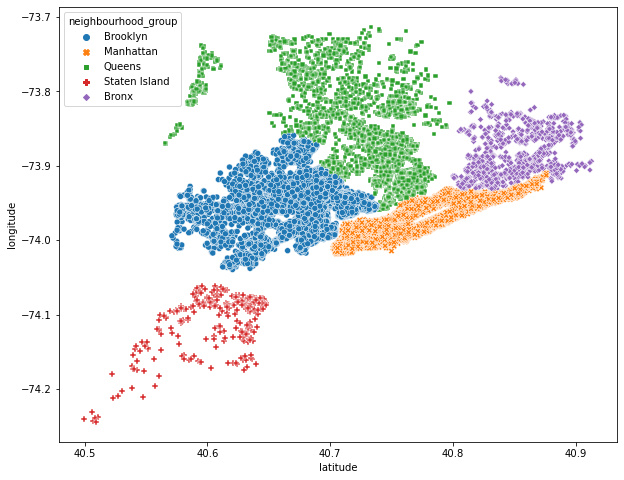

In [81]:
#let us find out at which location, the maximum number of hosts are located
# we can use latitude and longitude coulmns for that.
plt.figure(figsize = (10,8))
sns.scatterplot(data=df, x="latitude", y="longitude", hue="neighbourhood_group", style='neighbourhood_group')

In [17]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [20]:
df.host_name.nunique()

11452

# INFERENCE - 
1. We have 37,457 unique hosts across 5 neighbourhoods namely Brooklyn, Manhattan, Queens, Staten Island and Bronx.
2. Maximum number of listings are in Manhattan, followed by Brooklyn.
3. Least number of listings are in Staten Island.
4. We have 3 types of rooms - Private room, Entire home/apartment and Shared room

In [31]:
#df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [33]:
#let us consider only columns host_id, neighburhood,  neighbourhood_group, room_type, price, number_of_reviews and availability_365

df1 = df[['host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'availability_365']]

In [35]:
df1

,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
0,2787,John,Brooklyn,Kensington,Private room,149,1,9,365
1,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,355
2,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,194
4,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0
...,...,...,...,...,...,...,...,...,...
48890,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,9
48891,6570630,Marisol,Brooklyn,Bushwick,Private room,40,4,0,36
48892,23492952,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115,10,0,27
48893,30985759,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,2


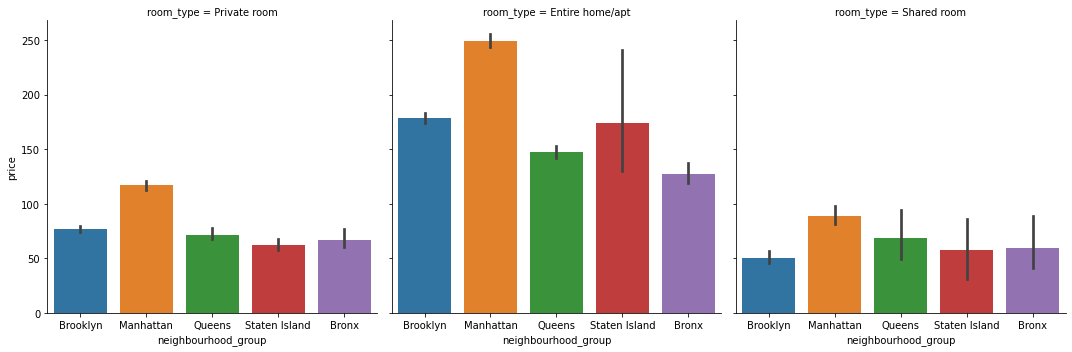

In [54]:
sns.catplot(x='neighbourhood_group',
            y='price',
            data=df1,
            kind='bar',
            col='room_type');

In [55]:
data = df1.groupby(['neighbourhood_group','room_type'])['price'].max()
df2 = pd.DataFrame(data)
df2

price
neighbourhood_group room_type             
Bronx               Entire home/apt   1000
                    Private room      2500
                    Shared room        800
Brooklyn            Entire home/apt  10000
                    Private room      7500
                    Shared room        725
Manhattan           Entire home/apt  10000
                    Private room      9999
                    Shared room       1000
Queens              Entire home/apt   2600
                    Private room     10000
                    Shared room       1800
Staten Island       Entire home/apt   5000
                    Private room       300
                    Shared room        150

In [56]:
data = df1.groupby(['neighbourhood_group','room_type'])['price'].mean()
df2 = pd.DataFrame(data)
df2

price
neighbourhood_group room_type                  
Bronx               Entire home/apt  127.506596
                    Private room      66.788344
                    Shared room       59.800000
Brooklyn            Entire home/apt  178.327545
                    Private room      76.500099
                    Shared room       50.527845
Manhattan           Entire home/apt  249.239109
                    Private room     116.776622
                    Shared room       88.977083
Queens              Entire home/apt  147.050573
                    Private room      71.762456
                    Shared room       69.020202
Staten Island       Entire home/apt  173.846591
                    Private room      62.292553
                    Shared room       57.444444

# INFERENCE - 
In above visualization, we can see the room prices in each neighbourhood in accordance with room type.
1. In all three types of room, Manhatten is the most expensive neighbourhood.
2. Bronx is where you can get Entire home/appartment in the lowest price.
3. Staten Island is where you can get Private room for the lowest price.
4. In Brooklyn, we an get Shared room for lowest price.

# What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [94]:
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

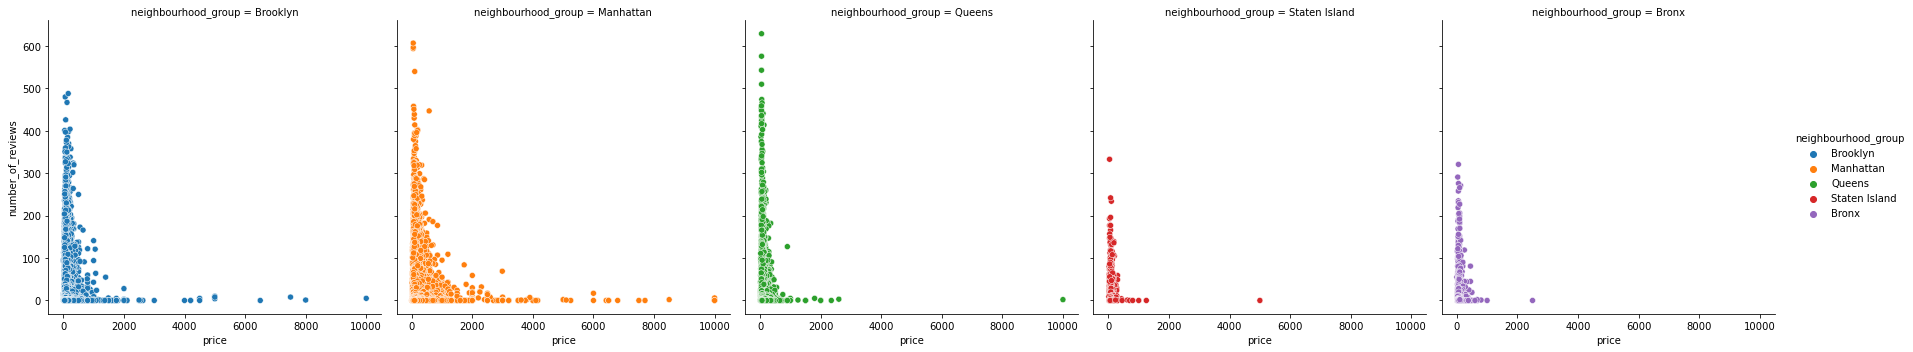

In [95]:
sns.relplot(
    data=df, x="price", y="number_of_reviews",
    hue="neighbourhood_group", col="neighbourhood_group", kind="scatter",
)

In [86]:
data = df1.groupby('neighbourhood_group')['number_of_reviews'].max()

In [87]:
pd.DataFrame(data)

,number_of_reviews
neighbourhood_group,
Bronx,321
Brooklyn,488
Manhattan,607
Queens,629
Staten Island,333


In [97]:
# data = df1.groupby('availability_365')['number_of_reviews'].max()
# pd.DataFrame(data)

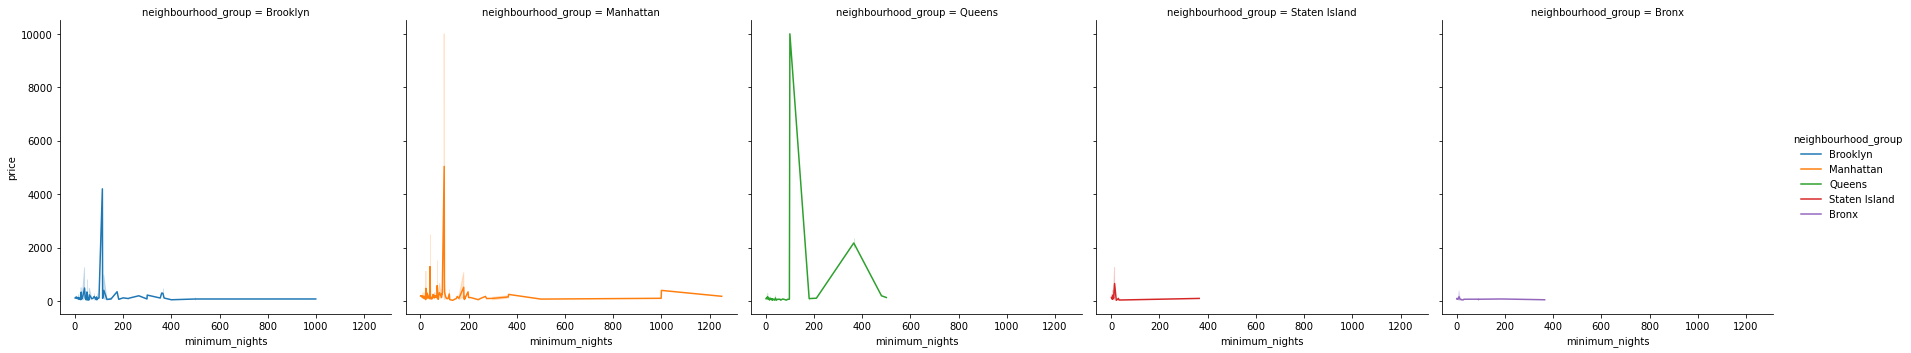

In [100]:
sns.relplot(data = df, x='minimum_nights', y='price', hue="neighbourhood_group", kind="line", col="neighbourhood_group")

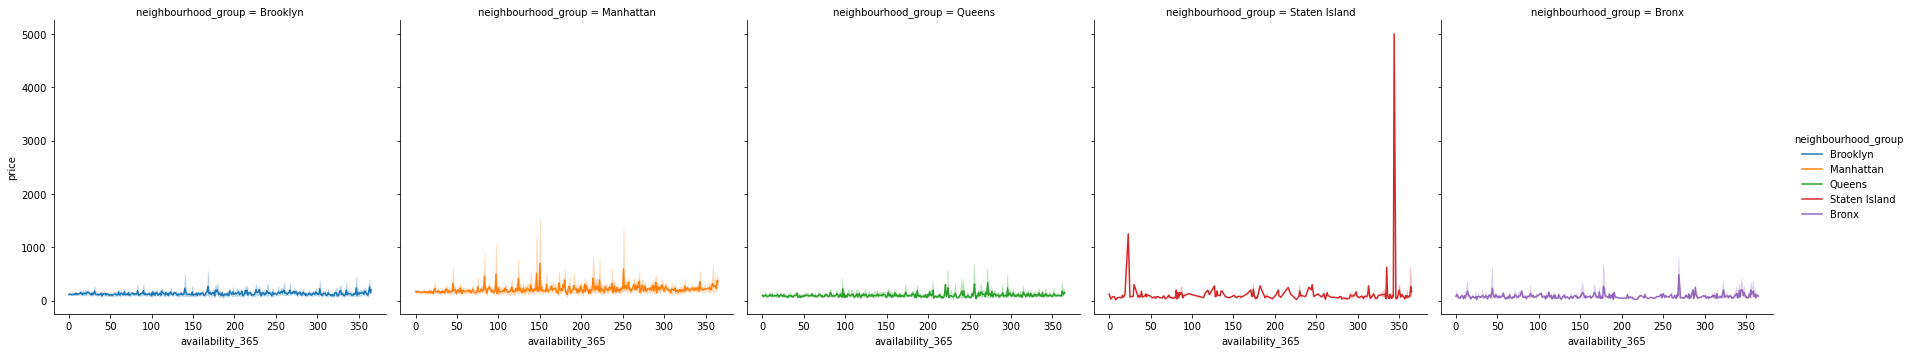

In [101]:
sns.relplot(data = df, x='availability_365', y='price', hue="neighbourhood_group", kind="line", col="neighbourhood_group")

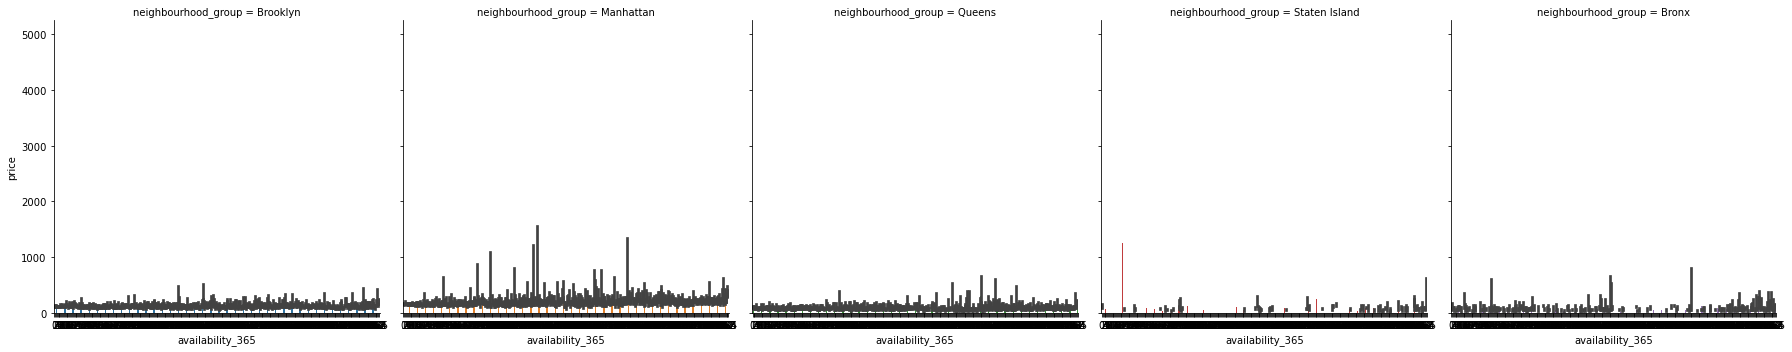

In [103]:
sns.catplot(data = df, x='availability_365', y='price', hue="neighbourhood_group", kind="bar", col="neighbourhood_group")

# INFERENCE - 
1. As we increase minimum number of nights, the listing price decreases.
2. As the price increases, the number of reviews decreases.
3. Maximum reviews are for Queens, followed by Manhattan. So we can infer that Queens listings has maximum number of visitors.
4. 365 days availability do not influence the listing price, except in case of Staten Island,
    where prices are more for listings that are available for all 365 days.